<a href="https://colab.research.google.com/github/prausela/nutri-stats/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nutrition Statistics

<a target="_blank" href="https://colab.research.google.com/github/prausela/nutri-stats/blob/main/main.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Import libraries

In [617]:
#pip install nbformat

In [618]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import math

## Read Excel File

In [619]:
df = pd.read_excel("Datos trabajo 1.xls")
df

,Grasas_sat,Alcohol,Calorías,Sexo
0,14.60,0.03,910,F
1,11.82,0.05,1026,F
2,16.98,0.14,1033,F
3,14.04,0.38,1098,F
4,15.30,0.38,1122,F
...,...,...,...,...
168,46.36,32.64,2285,M
169,39.30,32.72,2300,M
170,34.14,37.28,2333,M
171,999.99,37.90,2334,M


**Grasas Saturadas**
- Numérica
- Continua

**Alcohol**
- Numérica
- Continua

**Calorías**
- Numérica
- Discreta

**Sexo**
- Categórica
- Nominal

## Column Names

In [620]:
SAT_FAT = "Grasas_sat"
ALCOHOL = "Alcohol"
CAL     = "Calorías"
GENDER  = "Sexo"

## Rows Missing Values
1. Reemplace los datos faltantes.

In [621]:
MISSING_VAL = 999.99

In [622]:
rows_with_val           = lambda val, df : df[df.eq(val).any(axis=1)]
rows_with_missing_val   = lambda df      : rows_with_val(MISSING_VAL, df)

In [623]:
mv_df = rows_with_missing_val(df)
mv_df

,Grasas_sat,Alcohol,Calorías,Sexo
21,36.31,999.99,1000,F
24,41.01,999.99,800,F
162,27.08,999.99,2054,M
171,999.99,37.90,2334,M


### Comparison between the dataset with missing values vs without missing-value rows

In [624]:
df

,Grasas_sat,Alcohol,Calorías,Sexo
0,14.60,0.03,910,F
1,11.82,0.05,1026,F
2,16.98,0.14,1033,F
3,14.04,0.38,1098,F
4,15.30,0.38,1122,F
...,...,...,...,...
168,46.36,32.64,2285,M
169,39.30,32.72,2300,M
170,34.14,37.28,2333,M
171,999.99,37.90,2334,M


In [625]:
nm_df = df.drop(mv_df.index)
nm_df

,Grasas_sat,Alcohol,Calorías,Sexo
0,14.60,0.03,910,F
1,11.82,0.05,1026,F
2,16.98,0.14,1033,F
3,14.04,0.38,1098,F
4,15.30,0.38,1122,F
...,...,...,...,...
167,45.31,31.26,2260,M
168,46.36,32.64,2285,M
169,39.30,32.72,2300,M
170,34.14,37.28,2333,M


### Separate into variable vs gender vs calories datasets

In [626]:
drop_rows_with_missing_vals = lambda df : df.drop(rows_with_missing_val(df).index)

In [627]:
fat_df = df[[SAT_FAT, CAL, GENDER]]
fat_df = drop_rows_with_missing_vals(fat_df)
fat_df

,Grasas_sat,Calorías,Sexo
0,14.60,910,F
1,11.82,1026,F
2,16.98,1033,F
3,14.04,1098,F
4,15.30,1122,F
...,...,...,...
167,45.31,2260,M
168,46.36,2285,M
169,39.30,2300,M
170,34.14,2333,M


In [628]:
alcohol_df = df[[ALCOHOL, CAL, GENDER]]
alcohol_df = drop_rows_with_missing_vals(alcohol_df)
alcohol_df

,Alcohol,Calorías,Sexo
0,0.03,910,F
1,0.05,1026,F
2,0.14,1033,F
3,0.38,1098,F
4,0.38,1122,F
...,...,...,...
168,32.64,2285,M
169,32.72,2300,M
170,37.28,2333,M
171,37.90,2334,M


In [629]:
cal_df = df[[CAL, GENDER]]
cal_df

,Calorías,Sexo
0,910,F
1,1026,F
2,1033,F
3,1098,F
4,1122,F
...,...,...
168,2285,M
169,2300,M
170,2333,M
171,2334,M


In [630]:
rows_with_missing_val(nm_df)

,Grasas_sat,Alcohol,Calorías,Sexo


## Numeric Variables
2. a. Describa las principales caracterısticas que presentan los datos.

In [631]:
def df_to_compare_dist_normal_stats(c_df, i_df, c_df_label='Complete', i_df_label='Incomplete'):
    data = {
        c_df_label : [c_df.mean().iloc[0], c_df.std().iloc[0], c_df.skew().iloc[0], c_df.kurt().iloc[0]],
        i_df_label : [i_df.mean().iloc[0], i_df.std().iloc[0], i_df.skew().iloc[0], i_df.kurt().iloc[0]]
    }
    return pd.DataFrame(data, index=["mean", "std", "skew", "kurt"])

In [632]:
def df_normal_stats(df):
    data = {
        'Values' : [df.mean().iloc[0], df.std().iloc[0], df.skew().iloc[0], df.kurt().iloc[0]]
    }
    return pd.DataFrame(data, index=["mean", "std", "skew", "kurt"])

In [633]:
def df_iqr(df):
    quartiles = df.quantile(q=[0.25, 0.75])
    return quartiles.iloc[1] - quartiles.iloc[0]

In [634]:
def df_outliers(df, df_var):
    iqr = df_iqr(df[[df_var]]).iloc[0]
    q1 = df[[df_var]].quantile(q=[0.25]).iloc[0].iloc[0]
    q3 = df[[df_var]].quantile(q=[0.75]).iloc[0].iloc[0]
    sev_out_up = df[df[df_var] > q3 + 3*iqr].copy()
    sev_out_up['Out_type'] = "Severe Upper"
    mod_out_up = df[(df[df_var] > q3 + 1.5*iqr) & (df[df_var] <= q3 + 3*iqr) ].copy()
    mod_out_up['Out_type'] = "Moderate Upper"
    mod_out_low = df[(df[df_var] < q1 - 1.5*iqr) & (df[df_var] >= q1 - 3*iqr) ].copy()
    mod_out_low['Out_type'] = "Moderate Lower"
    sev_out_low = df[df[df_var] < q1 - 3*iqr].copy()
    sev_out_low['Out_type'] = "Severe Lower"
    return pd.concat([sev_out_up, mod_out_up, mod_out_low, sev_out_low])

In [635]:
def df_outliers_nm(df, df_var):
    var_df_out = df_outliers(df, df_var)
    var_df_out = var_df_out[var_df_out[df_var] != MISSING_VAL]
    return var_df_out

In [636]:
def df_to_compare_dist_percentile_stats(c_df, i_df, c_df_label='Complete', i_df_label='Incomplete'):
    data = {
        c_df_label : [
                        c_df.median().iloc[0], c_df.quantile(q=[0.25]).iloc[0].iloc[0], c_df.quantile(q=[0.75]).iloc[0].iloc[0], df_iqr(c_df).iloc[0], 
                        c_df.quantile(q=[0.25]).iloc[0].iloc[0] - 1.5*df_iqr(c_df).iloc[0],
                        c_df.quantile(q=[0.75]).iloc[0].iloc[0] + 1.5*df_iqr(c_df).iloc[0],
                        c_df.quantile(q=[0.25]).iloc[0].iloc[0] - 3*df_iqr(c_df).iloc[0],
                        c_df.quantile(q=[0.75]).iloc[0].iloc[0] + 3*df_iqr(c_df).iloc[0]
                    ],
        i_df_label : [
                        i_df.median().iloc[0], i_df.quantile(q=[0.25]).iloc[0].iloc[0], i_df.quantile(q=[0.75]).iloc[0].iloc[0], df_iqr(i_df).iloc[0],
                        i_df.quantile(q=[0.25]).iloc[0].iloc[0] - 1.5*df_iqr(i_df).iloc[0],
                        i_df.quantile(q=[0.75]).iloc[0].iloc[0] + 1.5*df_iqr(i_df).iloc[0],
                        i_df.quantile(q=[0.25]).iloc[0].iloc[0] - 3*df_iqr(i_df).iloc[0],
                        i_df.quantile(q=[0.75]).iloc[0].iloc[0] + 3*df_iqr(i_df).iloc[0]
                    ]
    }
    return pd.DataFrame(data, index=["median", "q1", "q3", "iqr", "mod out low", "mod out up", "sev out low", "sev out up"])

In [637]:
def df_percentile_stats(df):
    data = {
        "Values" : [
                        df.median().iloc[0], df.quantile(q=[0.25]).iloc[0].iloc[0], df.quantile(q=[0.75]).iloc[0].iloc[0], df_iqr(df).iloc[0], 
                        df.quantile(q=[0.25]).iloc[0].iloc[0] - 1.5*df_iqr(df).iloc[0],
                        df.quantile(q=[0.75]).iloc[0].iloc[0] + 1.5*df_iqr(df).iloc[0],
                        df.quantile(q=[0.25]).iloc[0].iloc[0] - 3*df_iqr(df).iloc[0],
                        df.quantile(q=[0.75]).iloc[0].iloc[0] + 3*df_iqr(df).iloc[0]
                    ]
    }
    return pd.DataFrame(data, index=["median", "q1", "q3", "iqr", "mod out low", "mod out up", "sev out low", "sev out up"])

In [638]:
drop_rows_with_missing_vals(mv_df[[SAT_FAT]])

,Grasas_sat
21,36.31
24,41.01
162,27.08


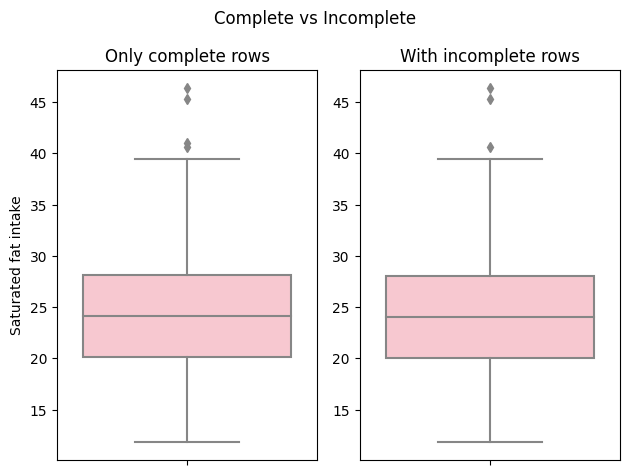

In [639]:
figure, axis = plt.subplots(1, 2)
sns.boxplot(y=SAT_FAT, data=fat_df,             ax=axis[0], color="pink")
sns.boxplot(y=SAT_FAT, data=nm_df[[SAT_FAT]],   ax=axis[1], color="pink")
axis[0].set_title("Only complete rows")
axis[0].set_ylabel("Saturated fat intake")
axis[1].set_title("With incomplete rows")
axis[1].set_ylabel("")
figure.suptitle("Complete vs Incomplete")
figure.tight_layout()
plt.show()

In [640]:
df_to_compare_dist_percentile_stats(fat_df[[SAT_FAT]], nm_df[[SAT_FAT]])

,Complete,Incomplete
median,24.13000,24.090
q1,20.16750,20.070
q3,28.09500,28.020
iqr,7.92750,7.950
mod out low,8.27625,8.145
mod out up,39.98625,39.945
sev out low,-3.61500,-3.780
sev out up,51.87750,51.870


In [641]:
fat_df_out = df_outliers(df, SAT_FAT)
fat_df_out = fat_df_out[fat_df_out[SAT_FAT] != MISSING_VAL]
fat_df_out

,Grasas_sat,Alcohol,Calorías,Sexo,Out_type
24,41.01,999.99,800,F,Moderate Upper
167,45.31,31.26,2260,M,Moderate Upper
168,46.36,32.64,2285,M,Moderate Upper
172,40.59,40.11,2376,M,Moderate Upper


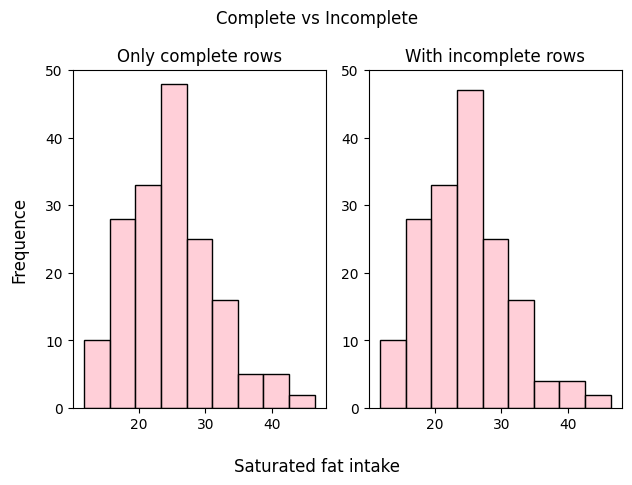

In [642]:
figure, axis = plt.subplots(1, 2)
sns.histplot(x=SAT_FAT, data=fat_df,             ax=axis[0], color="pink", bins=(math.ceil(math.log2(fat_df.shape[0]))+1))
sns.histplot(x=SAT_FAT, data=nm_df[[SAT_FAT]],   ax=axis[1], color="pink", bins=(math.ceil(math.log2(nm_df[[SAT_FAT]].shape[0]))+1))
axis[0].set_title("Only complete rows")
axis[0].set_ylabel(None)
axis[0].set_xlabel(None)
axis[0].set_ylim([0, 50])
axis[1].set_title("With incomplete rows")
axis[1].set_ylabel(None)
axis[1].set_xlabel(None)
axis[1].set_ylim([0, 50])
figure.suptitle("Complete vs Incomplete")
figure.supxlabel("Saturated fat intake")
figure.supylabel("Frequence")
figure.tight_layout()
plt.show()

In [643]:
df_to_compare_dist_normal_stats(fat_df[[SAT_FAT]], nm_df[[SAT_FAT]])

,Complete,Incomplete
mean,24.774302,24.596331
std,6.533947,6.405481
skew,0.662412,0.666595
kurt,0.492250,0.606854


In [644]:
drop_rows_with_missing_vals(mv_df[[ALCOHOL]])

,Alcohol
171,37.9


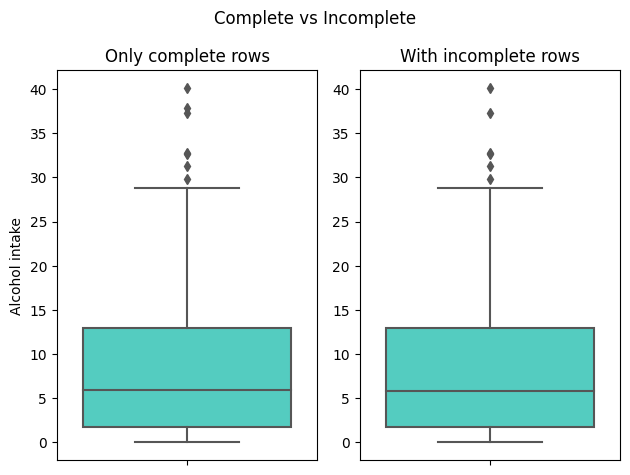

In [645]:
figure, axis = plt.subplots(1, 2)
sns.boxplot(y=ALCOHOL, data=alcohol_df,         ax=axis[0], color="turquoise")
sns.boxplot(y=ALCOHOL, data=nm_df[[ALCOHOL]],   ax=axis[1], color="turquoise")
axis[0].set_title("Only complete rows")
axis[0].set_ylabel("Alcohol intake")
axis[1].set_title("With incomplete rows")
axis[1].set_ylabel("")
figure.suptitle("Complete vs Incomplete")
figure.tight_layout()
plt.show()

In [646]:
df_to_compare_dist_percentile_stats(alcohol_df[[ALCOHOL]], nm_df[[ALCOHOL]])

,Complete,Incomplete
median,5.9050,5.840
q1,1.7800,1.760
q3,12.9650,12.950
iqr,11.1850,11.190
mod out low,-14.9975,-15.025
mod out up,29.7425,29.735
sev out low,-31.7750,-31.810
sev out up,46.5200,46.520


In [647]:
alcohol_df_out = df_outliers(df, ALCOHOL)
alcohol_df_out = alcohol_df_out[alcohol_df_out[ALCOHOL] != MISSING_VAL]
alcohol_df_out

,Grasas_sat,Alcohol,Calorías,Sexo,Out_type
168,46.36,32.64,2285,M,Moderate Upper
169,39.30,32.72,2300,M,Moderate Upper
170,34.14,37.28,2333,M,Moderate Upper
171,999.99,37.90,2334,M,Moderate Upper
172,40.59,40.11,2376,M,Moderate Upper


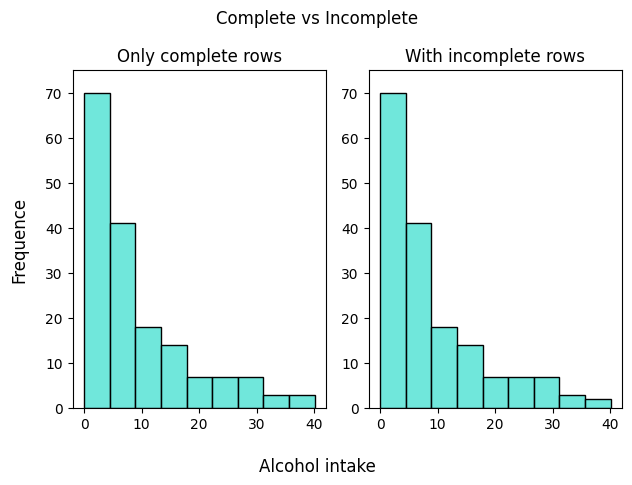

In [648]:
figure, axis = plt.subplots(1, 2)
sns.histplot(x=ALCOHOL, data=alcohol_df,         ax=axis[0], color="turquoise", bins=(math.ceil(math.log2(alcohol_df.shape[0]))+1))
sns.histplot(x=ALCOHOL, data=nm_df[[ALCOHOL]],   ax=axis[1], color="turquoise", bins=(math.ceil(math.log2(nm_df[[ALCOHOL]].shape[0]))+1))
axis[0].set_title("Only complete rows")
axis[0].set_ylabel(None)
axis[0].set_xlabel(None)
axis[0].set_ylim([0, 75])
axis[1].set_title("With incomplete rows")
axis[1].set_ylabel(None)
axis[1].set_xlabel(None)
axis[1].set_ylim([0, 75])
figure.suptitle("Complete vs Incomplete")
figure.supylabel("Frequence")
figure.supxlabel("Alcohol intake")
figure.tight_layout()
plt.show()

In [649]:
df_to_compare_dist_normal_stats(alcohol_df[[ALCOHOL]], nm_df[[ALCOHOL]])

,Complete,Incomplete
mean,8.832000,8.660000
std,9.193883,8.942674
skew,1.333578,1.309404
kurt,1.198597,1.138140


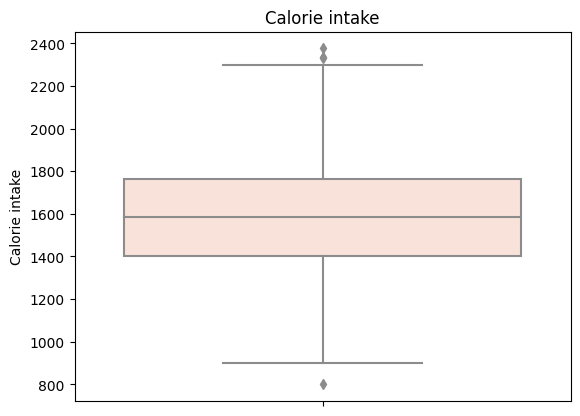

In [650]:
sns.boxplot(y=CAL, data=cal_df, color="#FFDFD3")
plt.title("Calorie intake")
plt.ylabel("Calorie intake")
plt.show()

In [651]:
df_percentile_stats(cal_df[[CAL]])

,Values
median,1585.0
q1,1400.0
q3,1761.0
iqr,361.0
mod out low,858.5
mod out up,2302.5
sev out low,317.0
sev out up,2844.0


In [652]:
cal_df_out = df_outliers(df, CAL)
cal_df_out

,Grasas_sat,Alcohol,Calorías,Sexo,Out_type
170,34.14,37.28,2333,M,Moderate Upper
171,999.99,37.90,2334,M,Moderate Upper
172,40.59,40.11,2376,M,Moderate Upper
24,41.01,999.99,800,F,Moderate Lower


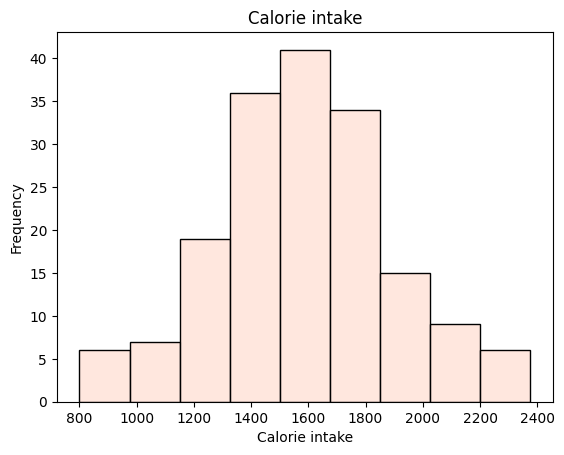

In [653]:
sns.histplot(x=CAL, data=cal_df, color="#FFDFD3", bins=(math.ceil(math.log2(cal_df.shape[0]))+1))
plt.title("Calorie intake")
plt.xlabel("Calorie intake")
plt.ylabel("Frequency")
plt.show()

In [654]:
df_normal_stats(cal_df[[CAL]])

,Values
mean,1584.554913
std,305.080991
skew,0.112333
kurt,0.186980


## Boxplots
2. b. Realizar gráficos boxplots. En todos los casos debe comentar los resultados.

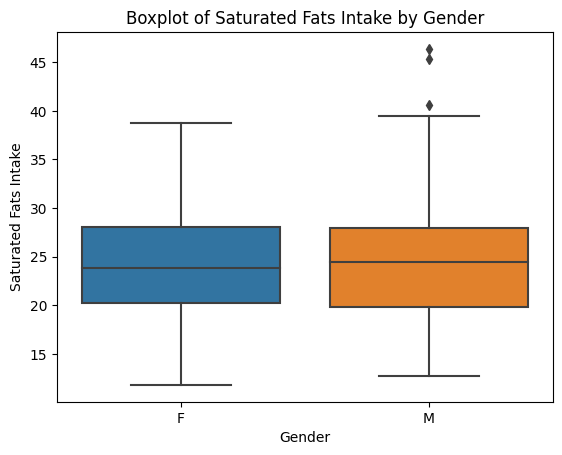

In [655]:
plt.figure()
sns.boxplot(x=GENDER, y=SAT_FAT, data=nm_df)
plt.title('Boxplot of Saturated Fats Intake by Gender')
plt.xlabel('Gender')
plt.ylabel('Saturated Fats Intake')
plt.show()

In [656]:
df_to_compare_dist_percentile_stats(nm_df[nm_df[GENDER] == "F"][[SAT_FAT]], nm_df[nm_df[GENDER] == "M"][[SAT_FAT]], "F", "M")

,F,M
median,23.79,24.49000
q1,20.20,19.80250
q3,28.02,27.95000
iqr,7.82,8.14750
mod out low,8.47,7.58125
mod out up,39.75,40.17125
sev out low,-3.26,-4.64000
sev out up,51.48,52.39250


In [657]:
pd.concat([df_outliers_nm(nm_df[nm_df[GENDER] == "F"], SAT_FAT), df_outliers_nm(nm_df[nm_df[GENDER] == "M"], SAT_FAT)])

,Grasas_sat,Alcohol,Calorías,Sexo,Out_type
167,45.31,31.26,2260,M,Moderate Upper
168,46.36,32.64,2285,M,Moderate Upper
172,40.59,40.11,2376,M,Moderate Upper


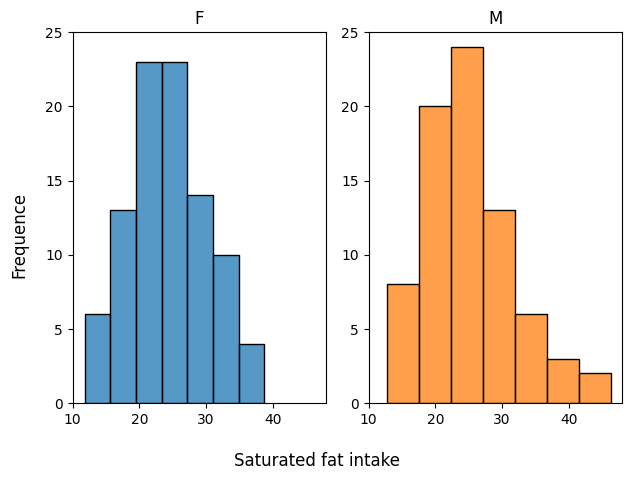

In [658]:
figure, axis = plt.subplots(1, 2)
sns.histplot(x=SAT_FAT, data=nm_df[nm_df[GENDER] == "F"][[SAT_FAT]],   ax=axis[0], color=sns.color_palette()[0], bins=(math.ceil(math.log2(nm_df[nm_df[GENDER] == "F"][[SAT_FAT]].shape[0]))))
sns.histplot(x=SAT_FAT, data=nm_df[nm_df[GENDER] == "M"][[SAT_FAT]],   ax=axis[1], color=sns.color_palette()[1], bins=(math.ceil(math.log2(nm_df[nm_df[GENDER] == "M"][[SAT_FAT]].shape[0]))))
axis[0].set_title("F")
axis[0].set_ylabel(None)
axis[0].set_xlabel(None)
axis[0].set_xlim([10, 48])
axis[0].set_ylim([0, 25])
axis[1].set_title("M")
axis[1].set_ylabel(None)
axis[1].set_xlabel(None)
axis[1].set_xlim([10, 48])
axis[1].set_ylim([0, 25])
figure.supylabel("Frequence")
figure.supxlabel("Saturated fat intake")
figure.tight_layout()
plt.show()

In [659]:
df_to_compare_dist_normal_stats(nm_df[nm_df[GENDER] == "F"][[SAT_FAT]], nm_df[nm_df[GENDER] == "M"][[SAT_FAT]], "F", "M")

,F,M
mean,24.283226,24.979474
std,5.910221,6.984910
skew,0.320345,0.881682
kurt,-0.348431,0.992943


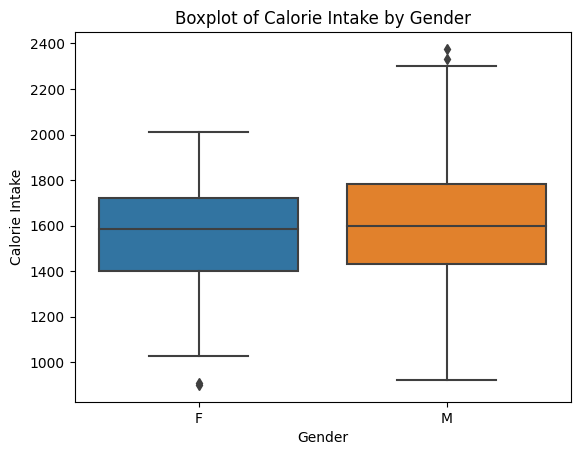

In [660]:
plt.figure()
sns.boxplot(x=GENDER, y=CAL, data=nm_df)
plt.title('Boxplot of Calorie Intake by Gender')
plt.xlabel('Gender')
plt.ylabel('Calorie Intake')
plt.show()

In [661]:
df_to_compare_dist_percentile_stats(nm_df[nm_df[GENDER] == "F"][[CAL]], nm_df[nm_df[GENDER] == "M"][[CAL]], "F", "M")

,F,M
median,1583.0,1598.00
q1,1400.0,1429.25
q3,1721.0,1782.75
iqr,321.0,353.50
mod out low,918.5,899.00
mod out up,2202.5,2313.00
sev out low,437.0,368.75
sev out up,2684.0,2843.25


In [ ]:
pd.concat([df_outliers_nm(nm_df[nm_df[GENDER] == "F"], CAL), df_outliers_nm(nm_df[nm_df[GENDER] == "M"], CAL)])

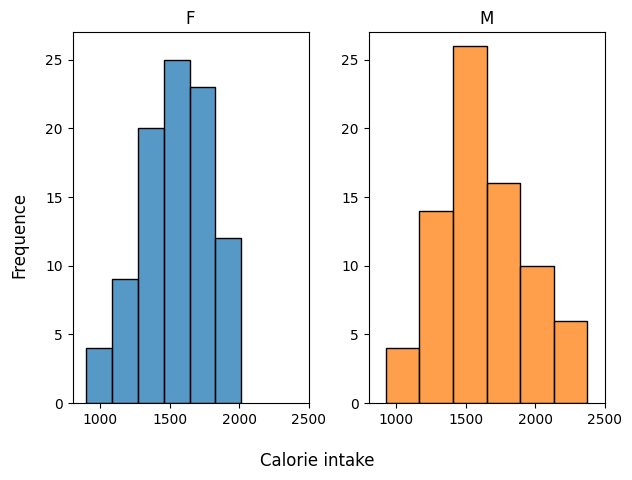

In [662]:
figure, axis = plt.subplots(1, 2)
sns.histplot(x=CAL, data=nm_df[nm_df[GENDER] == "F"][[CAL]],   ax=axis[0], color=sns.color_palette()[0], bins=(math.ceil(math.log2(nm_df[nm_df[GENDER] == "F"][[CAL]].shape[0]))-1))
sns.histplot(x=CAL, data=nm_df[nm_df[GENDER] == "M"][[CAL]],   ax=axis[1], color=sns.color_palette()[1], bins=(math.ceil(math.log2(nm_df[nm_df[GENDER] == "M"][[CAL]].shape[0]))-1))
axis[0].set_title("F")
axis[0].set_ylabel(None)
axis[0].set_xlabel(None)
axis[0].set_ylim([0, 27])
axis[0].set_xlim([800, 2500])
axis[1].set_title("M")
axis[1].set_ylabel(None)
axis[1].set_xlabel(None)
axis[1].set_ylim([0, 27])
axis[1].set_xlim([800, 2500])
figure.supylabel("Frequence")
figure.supxlabel("Calorie intake")
figure.tight_layout()
plt.show()

In [663]:
df_to_compare_dist_normal_stats(nm_df[nm_df[GENDER] == "F"][[CAL]], nm_df[nm_df[GENDER] == "M"][[CAL]], "F", "M")

,F,M
mean,1550.946237,1627.657895
std,254.611698,327.804436
skew,-0.343828,0.298601
kurt,-0.219324,-0.087660


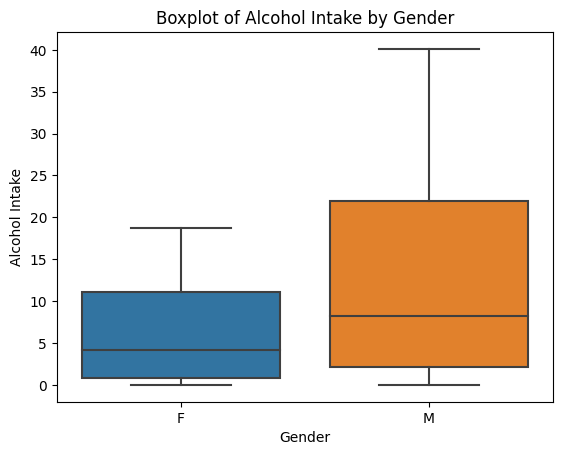

In [664]:
plt.figure()
sns.boxplot(x=GENDER, y=ALCOHOL, data=nm_df)
plt.title('Boxplot of Alcohol Intake by Gender')
plt.xlabel('Gender')
plt.ylabel('Alcohol Intake')
plt.show()

In [665]:
df_to_compare_dist_percentile_stats(nm_df[nm_df[GENDER] == "F"][[ALCOHOL]], nm_df[nm_df[GENDER] == "M"][[ALCOHOL]], "F", "M")

,F,M
median,4.210,8.24000
q1,0.800,2.19500
q3,11.150,21.91250
iqr,10.350,19.71750
mod out low,-14.725,-27.38125
mod out up,26.675,51.48875
sev out low,-30.250,-56.95750
sev out up,42.200,81.06500


In [ ]:
pd.concat([df_outliers_nm(nm_df[nm_df[GENDER] == "F"], ALCOHOL), df_outliers_nm(nm_df[nm_df[GENDER] == "M"], ALCOHOL)])

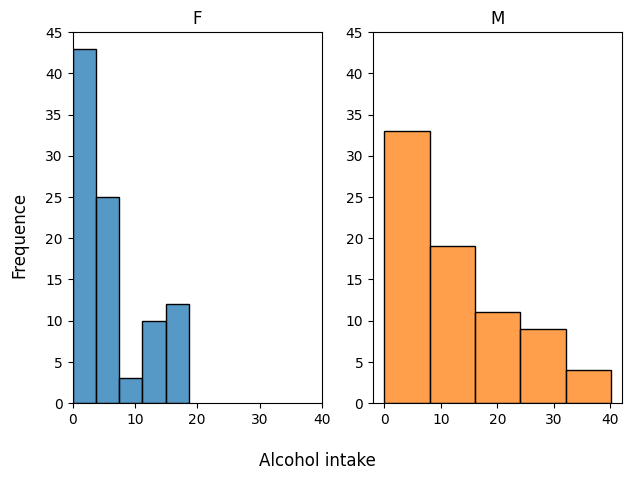

In [666]:
figure, axis = plt.subplots(1, 2)
sns.histplot(x=ALCOHOL, data=nm_df[nm_df[GENDER] == "F"][[ALCOHOL]],   ax=axis[0], color=sns.color_palette()[0], bins=(math.ceil(math.log2(nm_df[nm_df[GENDER] == "F"][[ALCOHOL]].shape[0]))-2))
sns.histplot(x=ALCOHOL, data=nm_df[nm_df[GENDER] == "M"][[ALCOHOL]],   ax=axis[1], color=sns.color_palette()[1], bins=(math.ceil(math.log2(nm_df[nm_df[GENDER] == "M"][[ALCOHOL]].shape[0]))-2))
axis[0].set_title("F")
axis[0].set_ylabel(None)
axis[0].set_xlabel(None)
axis[0].set_xlim([0, 40])
axis[0].set_ylim([0, 45])
axis[1].set_title("M")
axis[1].set_ylabel(None)
axis[1].set_xlabel(None)
axis[1].set_ylim([0, 40])
axis[1].set_ylim([0, 45])
figure.supylabel("Frequence")
figure.supxlabel("Alcohol intake")
figure.tight_layout()
plt.show()

In [667]:
df_to_compare_dist_normal_stats(nm_df[nm_df[GENDER] == "F"][[ALCOHOL]], nm_df[nm_df[GENDER] == "M"][[ALCOHOL]], "F", "M")

,F,M
mean,5.843548,12.106447
std,5.754154,10.800377
skew,0.862549,0.814275
kurt,-0.647571,-0.508692


## Scatter plots
3. Analice los datos para la variables Grasas sat, Alcohol y Calorıas de acuerdo a la variable categorica Sexo. Comentar los resultados

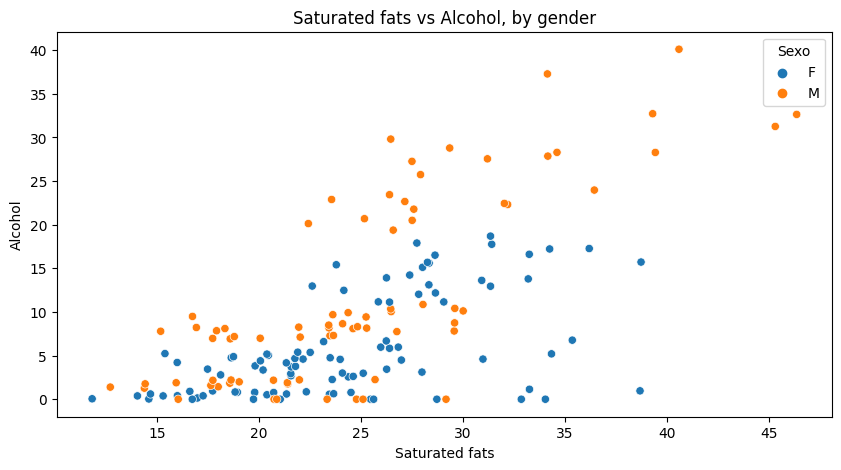

In [668]:
plt.figure(figsize=(10,5))
fig = sns.scatterplot(data=nm_df, x=SAT_FAT, y=ALCOHOL, hue=GENDER)
plt.title('Saturated fats vs Alcohol, by gender')
plt.xlabel('Saturated fats')
plt.ylabel('Alcohol')
plt.show()

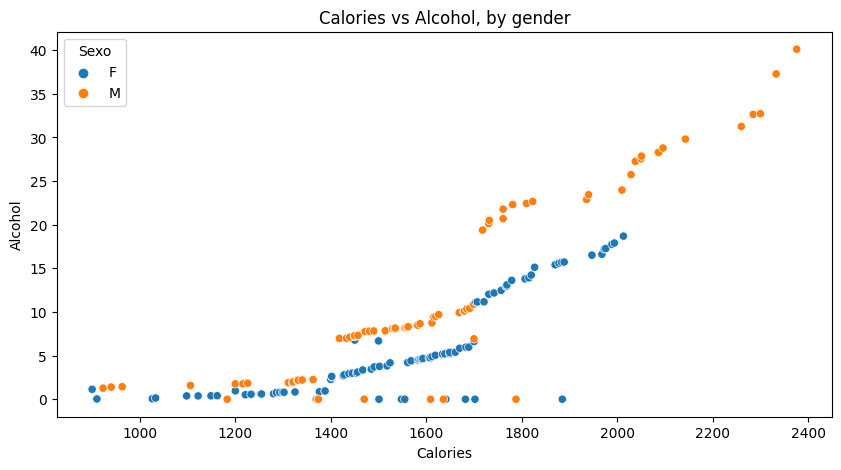

In [669]:
plt.figure(figsize=(10,5))
fig = sns.scatterplot(data=nm_df, x=CAL, y=ALCOHOL, hue=GENDER)
plt.title('Calories vs Alcohol, by gender')
plt.xlabel('Calories')
plt.ylabel('Alcohol')
plt.show()

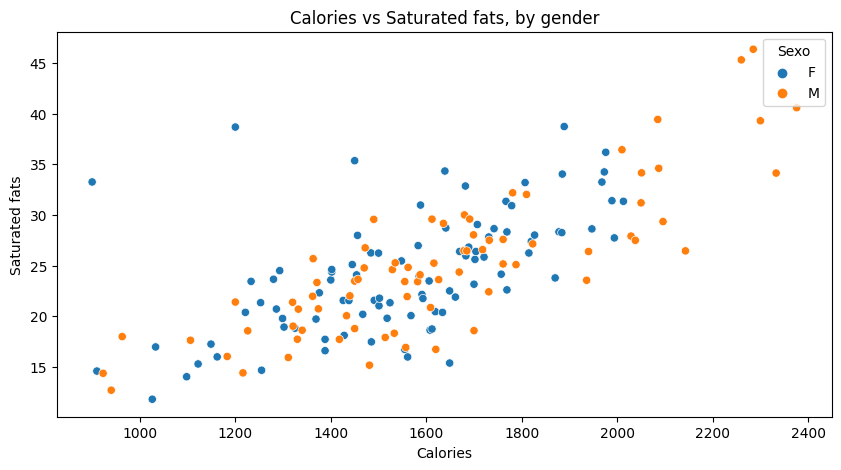

In [670]:
plt.figure(figsize=(10,5))
fig = sns.scatterplot(data=nm_df, x=CAL, y=SAT_FAT, hue=GENDER)
plt.title('Calories vs Saturated fats, by gender')
plt.xlabel('Calories')
plt.ylabel('Saturated fats')
plt.show()

In [671]:
fem_df = nm_df[nm_df[GENDER] == "F"]
masc_df = nm_df[nm_df[GENDER] == "M"]

In [672]:
x1 = fem_df[CAL]
y1 = fem_df[SAT_FAT]
z1 = fem_df[ALCOHOL]

x2 = masc_df[CAL]
y2 = masc_df[SAT_FAT]
z2 = masc_df[ALCOHOL]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x1, y=y1, z=z1, mode='markers', name="F"))
fig.add_trace(go.Scatter3d(x=x2, y=y2, z=z2, mode='markers', name="M"))
fig.update_layout(scene = dict(
  xaxis_title="Calories",
  yaxis_title="Saturated fats",
  zaxis_title="Alcohol"),
  title="Calories vs Saturated fats vs Alcohol, by gender",
  legend_title="Gender",
  width=800,
  margin=dict(r=10, b=10, l=10, t=60)
  )

fig.show()

## Alcohol Intake by Calories
4. Analice la variable Alcohol de acuerdo a la cantidad de calorıas consumidas, tomando 3 categorıas para la variable Calorıas: CATE 1:1100 o menos calorıas consumidas, CATE 2: mas de 1100 hasta 1700 calorıas consumidas, CATE 3: mas de 1700 calorıas consumidas.

In [673]:
CAL_CAT = "Calories_Category"

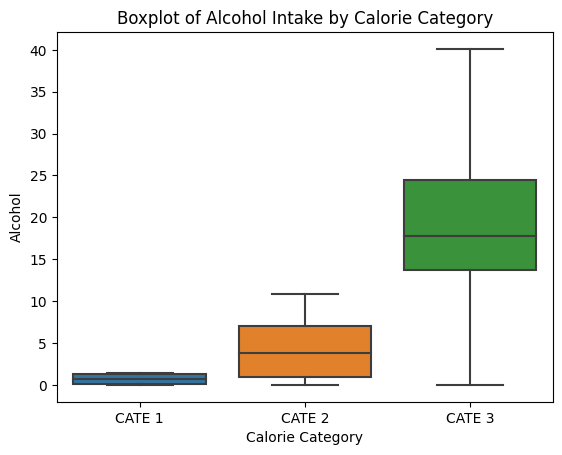

In [674]:
nm_df[CAL_CAT] = pd.cut(nm_df[CAL], bins=[0, 1100, 1700, float('inf')], labels=['CATE 1', 'CATE 2', 'CATE 3'])
plt.figure()
sns.boxplot(x=CAL_CAT, y=ALCOHOL, data=nm_df)
plt.title('Boxplot of Alcohol Intake by Calorie Category')
plt.xlabel('Calorie Category')
plt.ylabel('Alcohol')
plt.show()


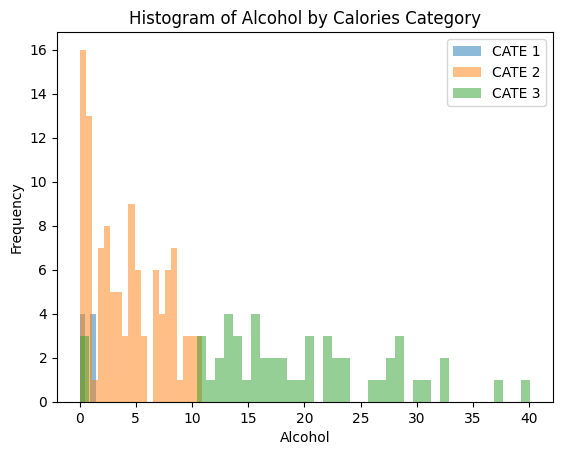

In [675]:
plt.hist(nm_df[nm_df[CAL_CAT] == 'CATE 1'][ALCOHOL], bins=3, alpha=0.5, label='CATE 1')
plt.hist(nm_df[nm_df[CAL_CAT] == 'CATE 2'][ALCOHOL], bins=20, alpha=0.5, label='CATE 2')
plt.hist(nm_df[nm_df[CAL_CAT] == 'CATE 3'][ALCOHOL], bins=50, alpha=0.5, label='CATE 3')


plt.title('Histogram of Alcohol by Calories Category')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.legend()
plt.show()

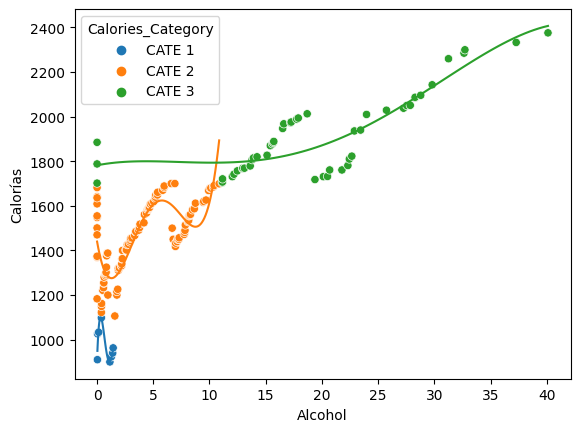

In [676]:
plt.figure()
sns.scatterplot(x=ALCOHOL, y=CAL, hue=CAL_CAT, data=nm_df)

for category in nm_df[CAL_CAT].unique():
    subset = nm_df[nm_df[CAL_CAT] == category]
    coeffs = np.polyfit(subset[ALCOHOL], subset[CAL], deg=4)
    poly = np.poly1d(coeffs)
    x_range = np.linspace(subset[ALCOHOL].min(), subset[ALCOHOL].max(), 100)
    plt.plot(x_range, poly(x_range), label=f'{category} Fit')


# subset1 = nm_df[nm_df['Calories_Category'] == 'CATE 1']
# m, b = np.polyfit(subset1['Alcohol'], subset1['Calorías'], 1)
# plt.plot(subset1['Alcohol'], m*subset1['Alcohol']+b)

In [677]:
nm_df[[ALCOHOL, CAL, SAT_FAT]].cov()

,Alcohol,Calorías,Grasas_sat
Alcohol,79.971415,2215.957798,37.681026
Calorías,2215.957798,84936.831643,1339.719138
Grasas_sat,37.681026,1339.719138,41.030191


In [678]:
nm_df[[ALCOHOL, CAL, SAT_FAT]].corr()

,Alcohol,Calorías,Grasas_sat
Alcohol,1.000000,0.850249,0.657815
Calorías,0.850249,1.000000,0.717652
Grasas_sat,0.657815,0.717652,1.000000
